# Evaluation of the similarity between genuine and synthetic data



In [1]:
# Import of necessary packages
import os
import pandas as pd
import numpy as np
from data_loading import df_from_file, synt_data_from_file, generate_from_pretrained
from utils import df_plot_separate

2024-02-29 11:35:34.356570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 11:35:34.444321: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-29 11:35:34.446696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-29 11:35:35.760203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


## Data preparation

In [2]:
# Importing original
orig_filename = "sensor_data_norm2_indexless_10days.csv"
orig_data = df_from_file(orig_filename)
orig_data.name = "Original data"

#Retrieve sensor names to use for synthetic and random data
sensor_names = list(orig_data.columns)

# Synthetic data
data_source = "from_csv" #Possibilities: from_csv, generate_from_pretrained
gen_model_filename = os.path.join(os.curdir, "trained_models", "model1.meta")
synt_filename = "gen_data_norm_indexless.csv"

synt_data = pd.DataFrame()
if data_source == "from_csv":
    try:
        synt_data = synt_data_from_file(synt_filename)
    except FileNotFoundError:
        print("The specified filename does not exist in the synt_data folder.")
    except IsADirectoryError:
        print("No filename was given")
elif data_source == "generate_from_pretrained":
    try: 
        synt_data = generate_from_pretrained("timegan", gen_model_filename, orig_data, orig_data_filename=orig_filename)
    except NameError:
        print("The specified filename for the pretrained model does not exist")
else:
    print("The data_source variable is not defined correctly. Choose either from_csv or generate_from_pretrained")


In [3]:
# Generating a random dataframe with the same dimensions. This will be used for control testing
rand_data = pd.DataFrame(np.random.normal(0, 0.1, orig_data.shape))
rand_data.name = "Randomly generated data"

In [4]:
synt_data.columns = sensor_names
rand_data.columns = sensor_names

In [5]:
print(f'The size of the original data dataframe is {orig_data.shape}')
print(f'The size of the synthetic data dataframe is {synt_data.shape}')
print(f'The size of the random data dataframe is {rand_data.shape}')

The size of the original data dataframe is (28800, 9)
The size of the synthetic data dataframe is (28776, 9)
The size of the random data dataframe is (28800, 9)


## Evaluation of synthetic data quality

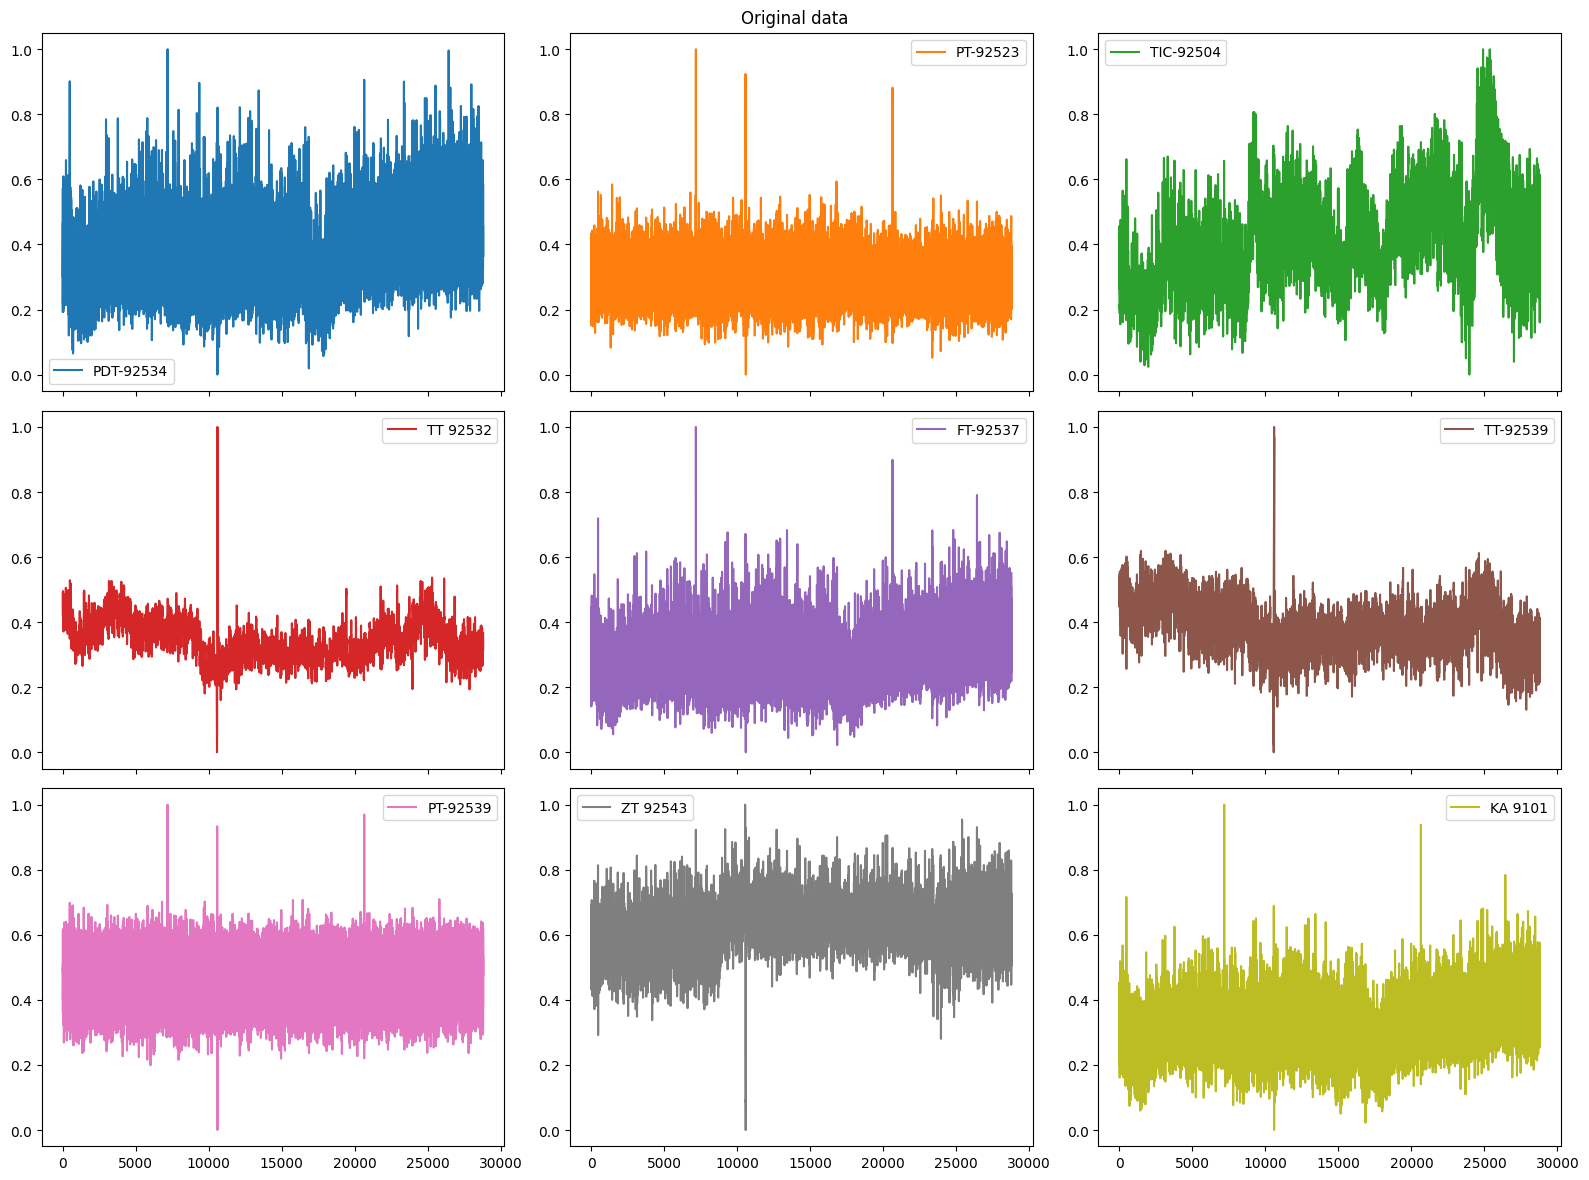

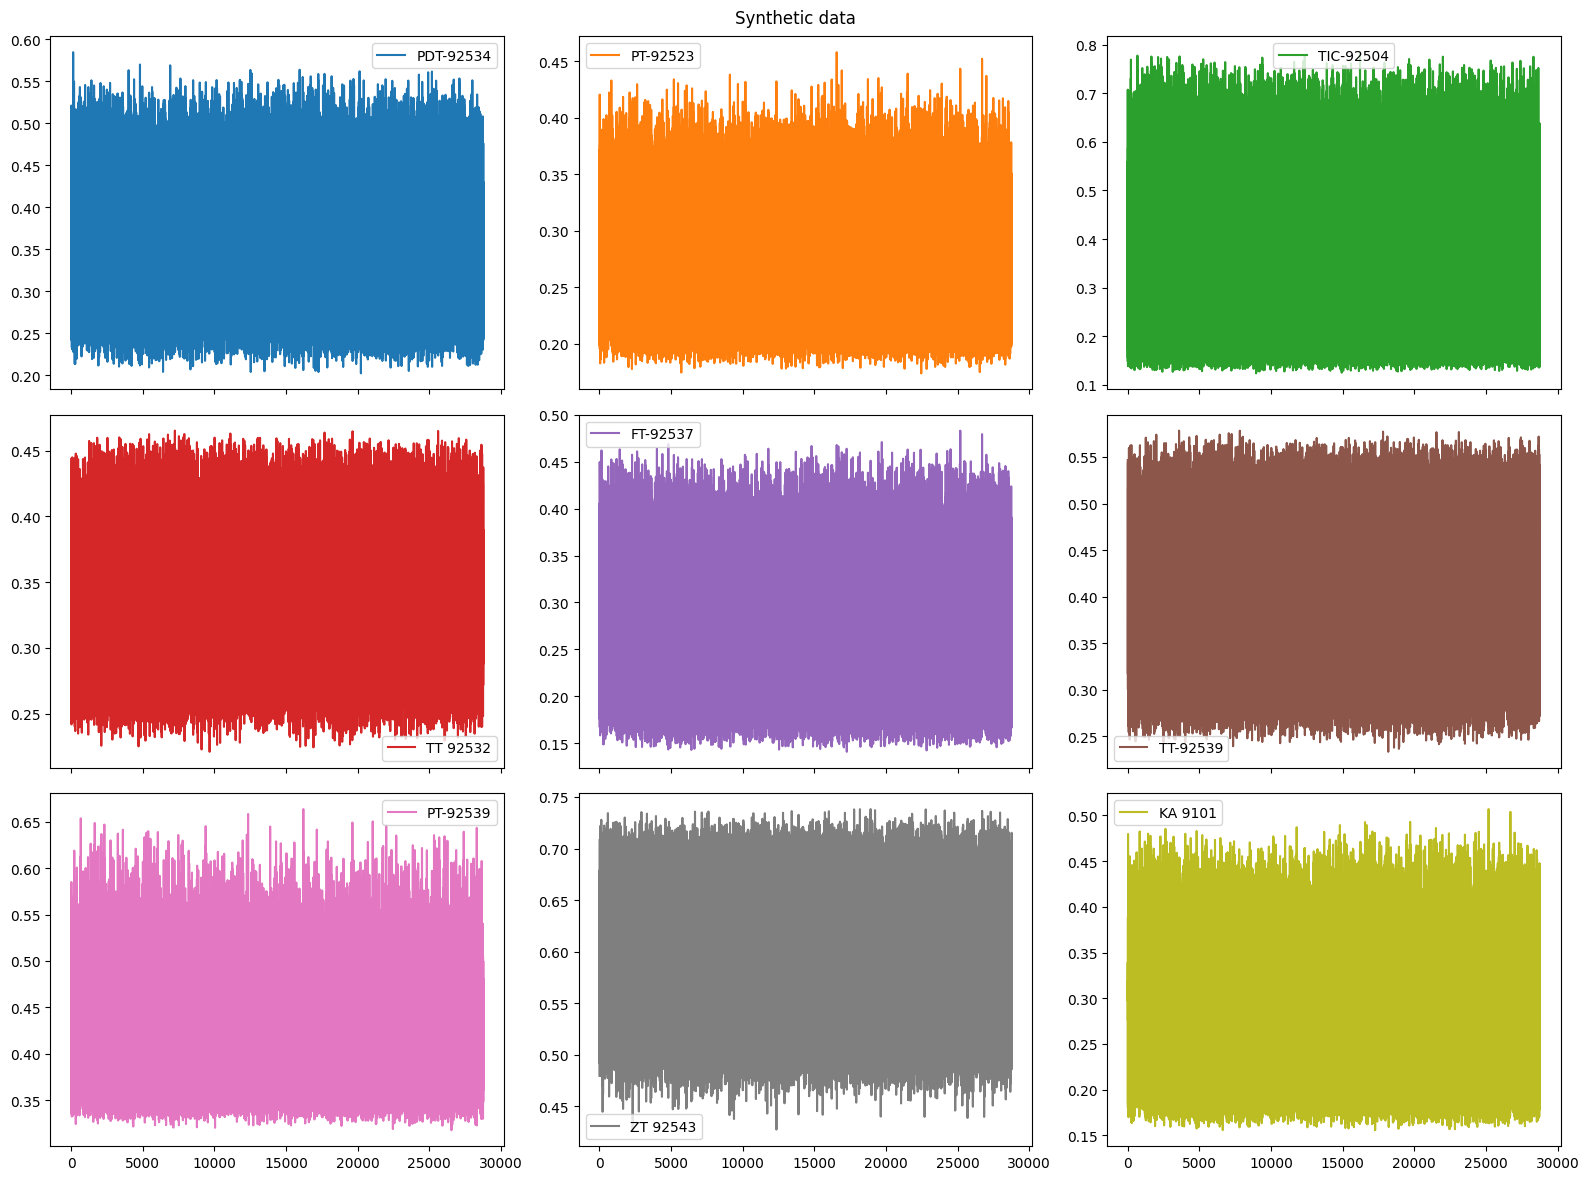

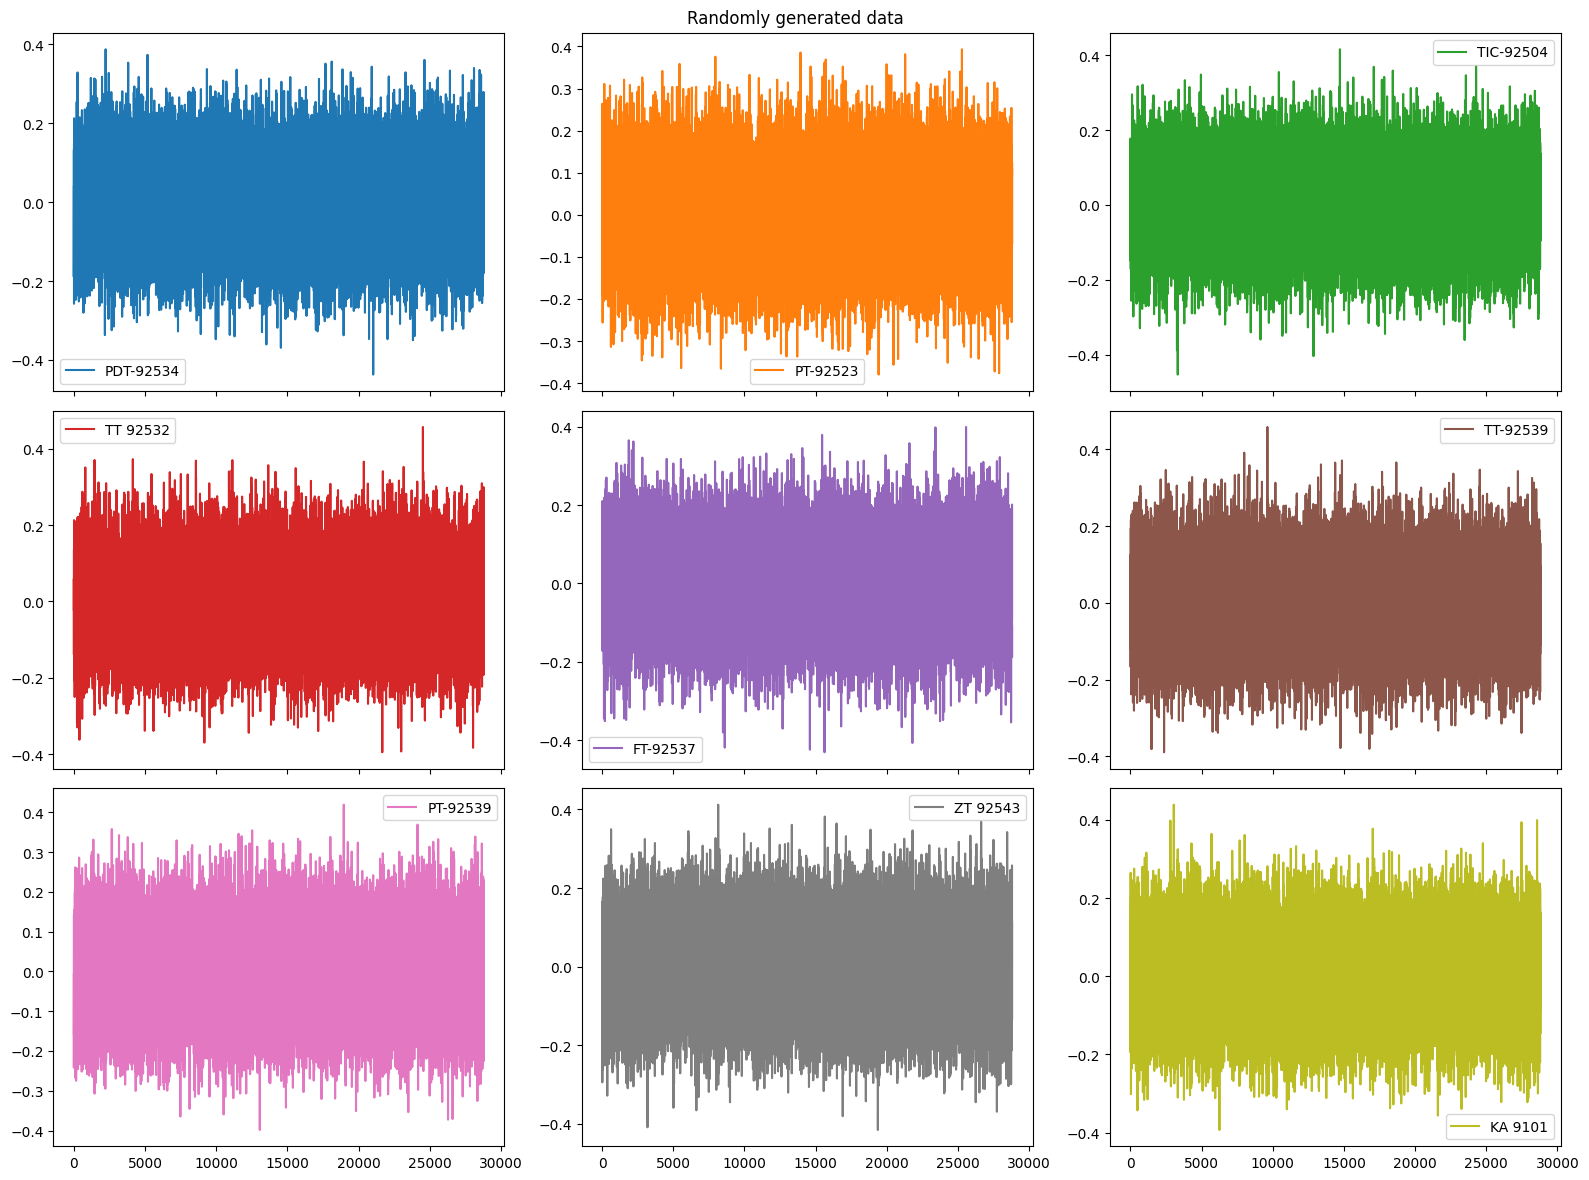

In [6]:
df_plot_separate(orig_data)
df_plot_separate(synt_data)
df_plot_separate(rand_data)